### importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Activation,Conv2D, MaxPooling2D,Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from keras.models import load_model
from sklearn .metrics import classification_report,confusion_matrix
from tensorflow.keras.layers import BatchNormalization
import os
import h5py

### loading of training and testing data

In [3]:
df= pd.read_csv("fashion-mnist_train.csv")  
df1= pd.read_csv("fashion-mnist_test.csv")

In [4]:
df1.head(1)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0


In [5]:
df.shape,df1.shape

((60000, 785), (10000, 785))

In [6]:
x_train=df.drop('label',axis=1) 
xtrain=np.array(x_train)
y_train=df['label']

x_test=df1.drop('label',axis=1)
xtest=np.array(x_test)
y_test=df1['label']

In [7]:
xtrain.shape, xtest.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [8]:
xtrain = xtrain/255.0   # scaling the data within (0,1)
xtest = xtest/255.0

In [9]:
xtrain.max(),xtest.max()

(1.0, 1.0)

In [10]:
clothing=  {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

In [11]:
ytrain= keras.utils.to_categorical(y_train,num_classes=10)
ytest=keras.utils.to_categorical(y_test,num_classes=10)

In [12]:
l=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# *Making LeNet Model

In [13]:
Xtrain=xtrain.reshape(-1,28,28,1)
Xtest=xtest.reshape(-1,28,28,1)
Xtrain.shape, Xtest.shape
ytrain.shape, ytest.shape, Xtrain[0].shape

((60000, 10), (10000, 10), (28, 28, 1))

In [14]:
ytrain.shape, ytest.shape, Xtrain[0].shape

((60000, 10), (10000, 10), (28, 28, 1))

In [15]:
Xtrain[0].shape

(28, 28, 1)

In [16]:
model = Sequential()

# LeNet-LAYERS
model.add(Conv2D(6, (5, 5),padding='same', activation='relu',kernel_initializer='he_uniform', input_shape=(Xtrain[0].shape)))
model.add(MaxPooling2D(pool_size=(2, 2))) 
#model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2))) 
#model.add(BatchNormalization())

model.add(Conv2D(120, (5, 5), kernel_initializer='he_uniform', activation='relu'))
#model.add(Dropout(0.5))
#model.add(MaxPooling2D(pool_size=(2, 2)))


# Fully connected layers-LAYERS
model.add(Flatten())

model.add(Dense(84, activation='relu'))
#model.add(Dropout(0.5))


# Classification layer
model.add(Dense(10, activation='softmax'))

adam = Adam()
#rms = RMSprop(learning_rate=0.00004, decay=1e-6, rho=0.92)
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        4832      
                                                                 
 dropout (Dropout)           (None, 10, 10, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         9

In [18]:
hist = model.fit(Xtrain, ytrain, validation_data=(Xtest,ytest),epochs=60,batch_size=128,verbose=1)

Epoch 1/60


2023-08-24 00:26:42.600572: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


469/469 [==============================] - 9s 19ms/step - loss: 0.6119 - accuracy: 0.7769 - val_loss: 0.4981 - val_accuracy: 0.8347
Epoch 2/60
469/469 [==============================] - 8s 18ms/step - loss: 0.4076 - accuracy: 0.8494 - val_loss: 0.3869 - val_accuracy: 0.8693
Epoch 3/60
469/469 [==============================] - 8s 18ms/step - loss: 0.3570 - accuracy: 0.8674 - val_loss: 0.3467 - val_accuracy: 0.8865
Epoch 4/60
469/469 [==============================] - 10s 20ms/step - loss: 0.3281 - accuracy: 0.8773 - val_loss: 0.3236 - val_accuracy: 0.8977
Epoch 5/60
469/469 [==============================] - 10s 21ms/step - loss: 0.3055 - accuracy: 0.8864 - val_loss: 0.3199 - val_accuracy: 0.8920
Epoch 6/60
469/469 [==============================] - 9s 19ms/step - loss: 0.2907 - accuracy: 0.8920 - val_loss: 0.2884 - val_accuracy: 0.9022
Epoch 7/60
469/469 [==============================] - 8s 18ms/step - loss: 0.2765 - accuracy: 0.8964 - val_loss: 0.2793 - val_accuracy: 0.9031
Epoch 8/

Epoch 58/60
469/469 [==============================] - 9s 19ms/step - loss: 0.1157 - accuracy: 0.9566 - val_loss: 0.2239 - val_accuracy: 0.9211
Epoch 59/60
469/469 [==============================] - 9s 20ms/step - loss: 0.1115 - accuracy: 0.9571 - val_loss: 0.2224 - val_accuracy: 0.9225
Epoch 60/60
469/469 [==============================] - 9s 20ms/step - loss: 0.1144 - accuracy: 0.9559 - val_loss: 0.2253 - val_accuracy: 0.9205


In [19]:
#score = model.evaluate(Xtest, ytest)
#print('Test Loss:', score[0])
#print('Test accuracy:', score[1])

In [20]:
val_acc = hist.history['val_accuracy']
acc = hist.history['accuracy']
val_loss = hist.history['val_loss']
loss = hist.history['loss']

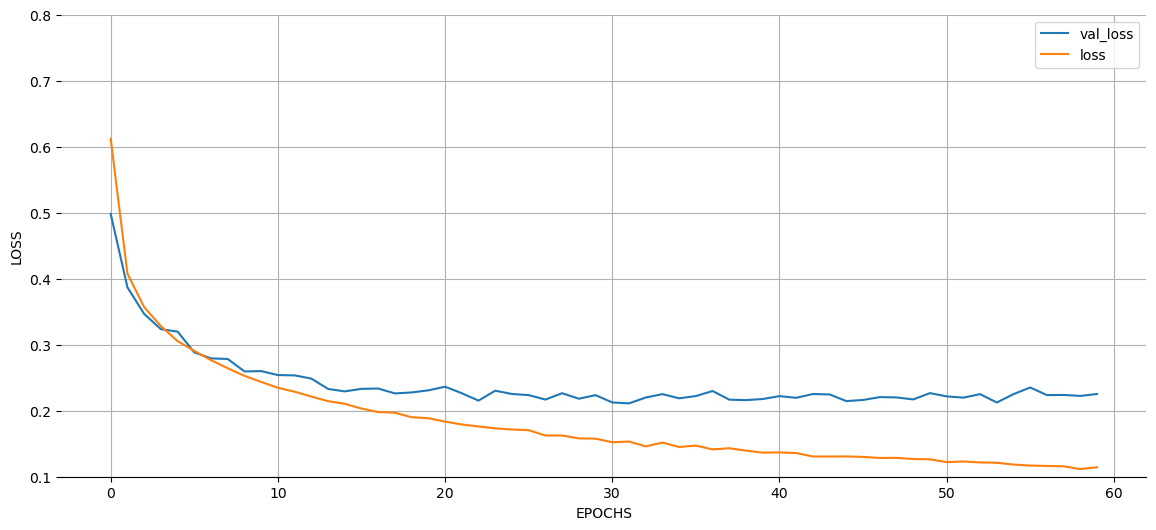

In [21]:
fig = plt.figure(figsize=(14,6))
plt.plot(np.arange(len(val_loss)),val_loss,label='val_loss')
plt.plot(np.arange(len(loss)),loss,label='loss')
plt.ylim(0.1,0.8)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.grid()
sns.despine(left=True)
plt.show()


Value Accuracy |  92.05 %


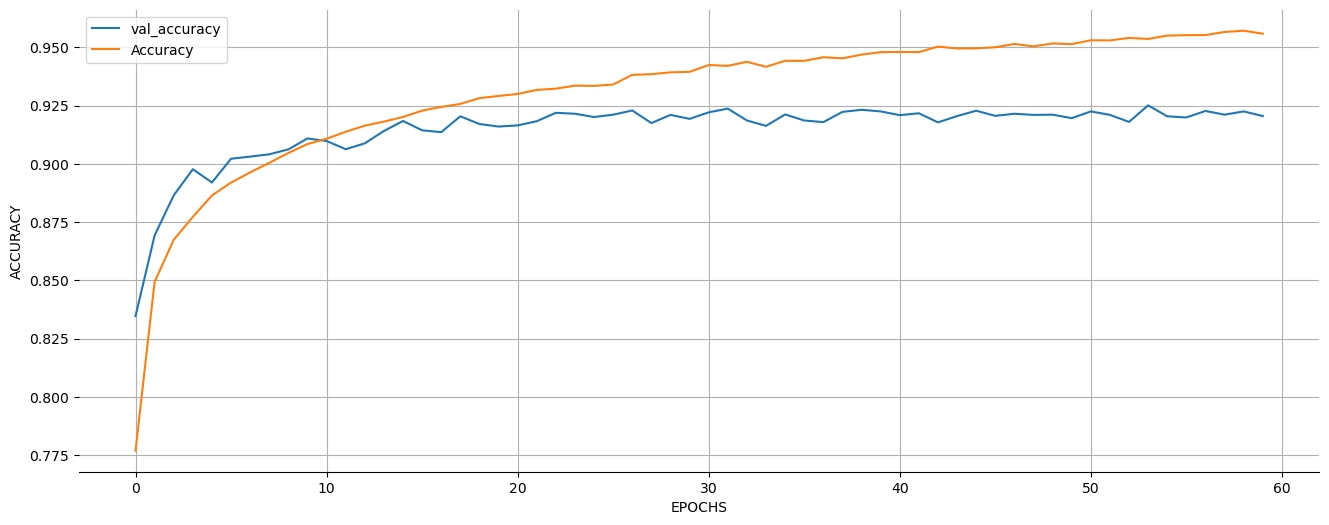

In [22]:
print("\nValue Accuracy | ",round(val_acc[len(acc)-1]*100,2),'%')
fig = plt.figure(figsize=(16,6))
plt.plot(np.arange(len(val_acc)),val_acc,label='val_accuracy')
plt.plot(np.arange(len(acc)),acc,label='Accuracy')
plt.xlabel("EPOCHS")
plt.ylabel('ACCURACY')
plt.legend()
plt.grid()
sns.despine(left=True)
plt.show()

In [23]:
pred = model.predict(Xtest,batch_size=250)

40/40 [==============================] - 1s 13ms/step


In [24]:
prd =[]
for i in range(len(pred)):
    prd.append(np.argmax(pred.round()[i]))
    
con = pd.DataFrame(confusion_matrix(y_test,prd),index=l,columns=l)

In [25]:
print('\nConfusion Matrix--->')
con


Confusion Matrix--->


,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,878,0,14,10,0,1,92,0,5,0
Trouser,1,992,0,5,0,0,2,0,0,0
Pullover,45,0,878,7,26,0,41,0,3,0
Dress,36,2,2,927,16,0,16,0,1,0
Coat,48,0,44,20,829,0,57,0,2,0
Sandal,2,0,0,0,0,973,0,14,2,9
Shirt,124,1,44,22,34,0,771,0,4,0
Sneaker,2,0,0,0,0,6,0,944,0,48
Bag,4,1,2,1,1,0,1,2,987,1
Ankle boot,0,0,0,0,0,2,0,25,0,973



Confusion Matrix Graph--->


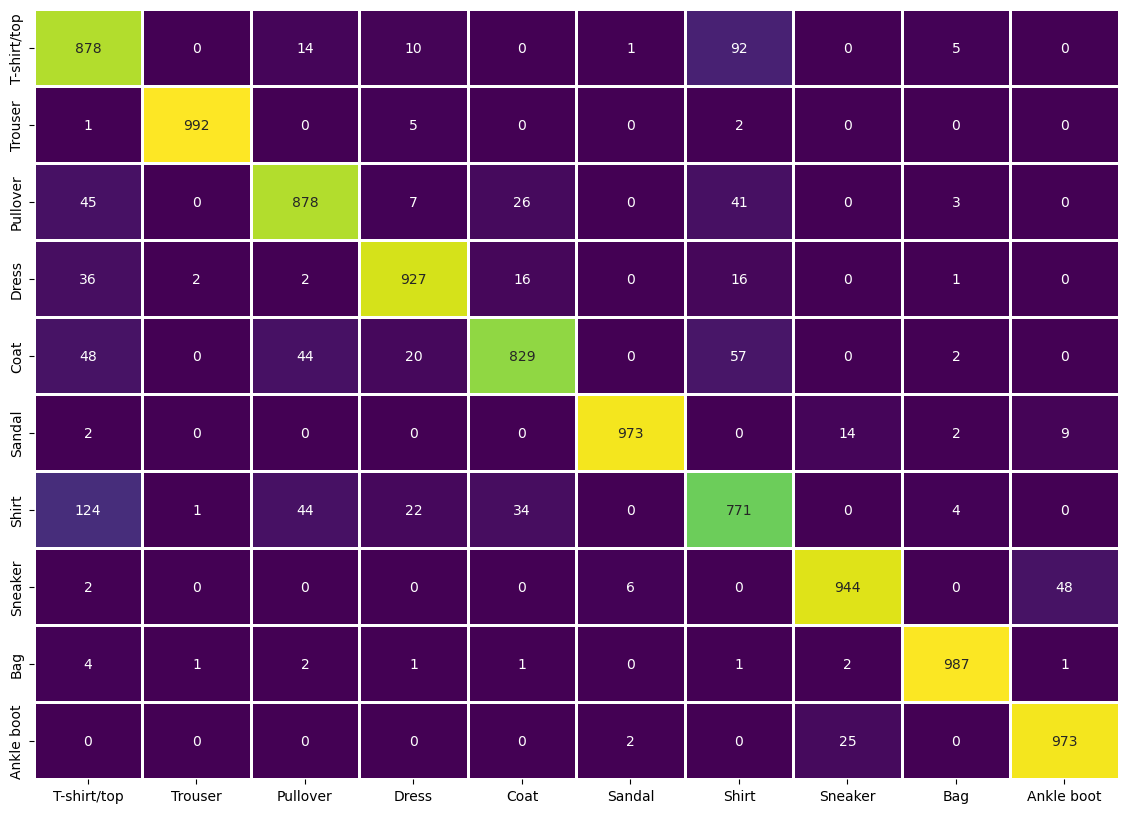

In [26]:
print('\nConfusion Matrix Graph--->')
fig = plt.figure(figsize=(14,10))
sns.heatmap(con,annot=True,cmap='viridis',linewidths=1,cbar=False,fmt='.5g')
plt.show()

In [27]:
pred_label=[]
label=[]
for i in range(len(prd)):
    pred_label.append(clothing[prd[i]])
    label.append(clothing[y_test[i]])
    
print(classification_report(label,pred_label))

              precision    recall  f1-score   support

  Ankle boot       0.94      0.97      0.96      1000
         Bag       0.98      0.99      0.99      1000
        Coat       0.92      0.83      0.87      1000
       Dress       0.93      0.93      0.93      1000
    Pullover       0.89      0.88      0.89      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.79      0.77      0.78      1000
     Sneaker       0.96      0.94      0.95      1000
 T-shirt/top       0.77      0.88      0.82      1000
     Trouser       1.00      0.99      0.99      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [28]:
model.save('fashion_ann_model.h5') #saving the model
del model

In [29]:
model = load_model('fashion_ann_model.h5')
model.summary()
#print('This Is the first LeNeT Model')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        4832      
                                                                 
 dropout (Dropout)           (None, 10, 10, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         9

In [30]:
Xtest = xtest.reshape(-1,28,28,1)
pred = model.predict(Xtest,batch_size=200,verbose=0)

In [31]:
l = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
'Shirt','Sneaker','Bag','Ankle boot']

In [32]:
Xtest = Xtest.reshape(-1,28,28)

Some Predicted Images


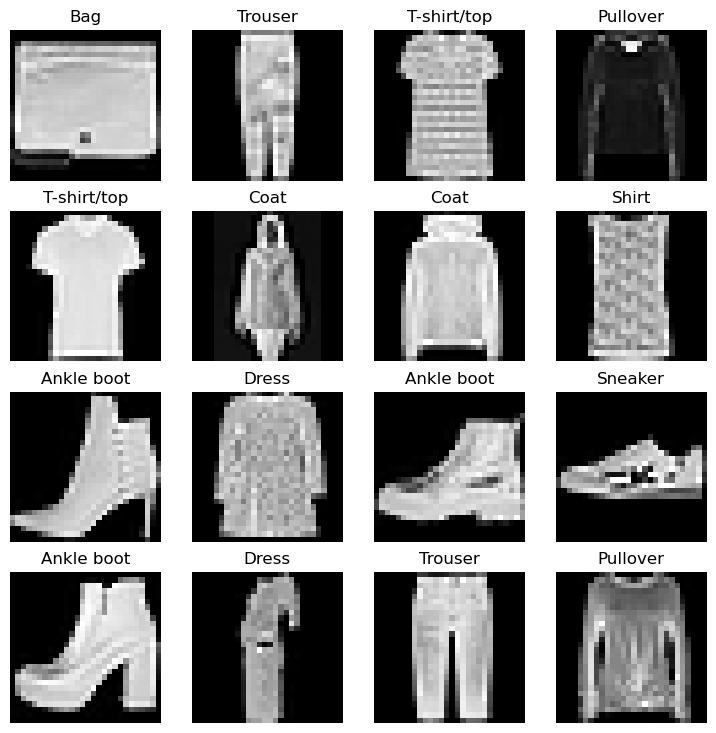

In [33]:
print('Some Predicted Images')
fig, axes = plt.subplots( 4,4,figsize = (9,9))
for row in axes:
    for j in row:
        index = np.random.randint(len(pred))
        j.imshow(Xtest[index],cmap='gray')
        j.set_title(clothing[np.argmax(pred[index])])
        j.set_axis_off()

###### some wrong predictions.

In [34]:

wrong_pred=[]
right_pred=[]
img=[]
for i in range(len(y_test)):
    if y_test[i]==np.argmax(pred[i]):
        right_pred.append(y_test[i])
    else:
        wrong_pred.append(y_test[i])
        img.append(Xtest[i])
        
print('No. of Correct Predictions     : ',len(right_pred))
print('No. of Incorrect Predictions   : ',len(wrong_pred))

No. of Correct Predictions     :  9205
No. of Incorrect Predictions   :  795


Some wrong Predicted images : 


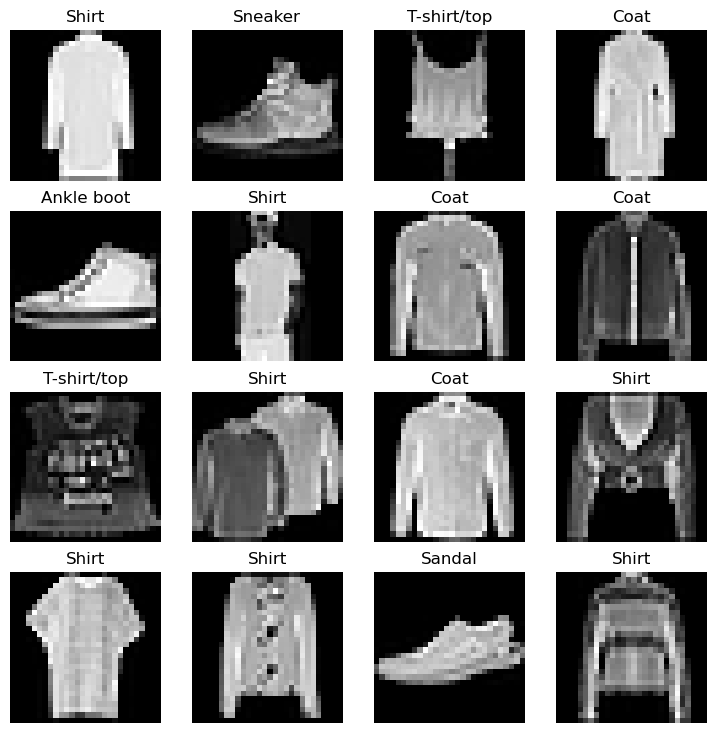

In [35]:
fig, axes = plt.subplots( 4,4,figsize = (9,9))
print('Some wrong Predicted images : ')
for row in axes:
    for j in row:
        index = np.random.randint(len(wrong_pred))
        j.imshow(img[index],cmap='gray')
        j.set_title(clothing[wrong_pred[index]])
        j.set_axis_off()

# Single Prediction :-

In [5]:
def prediction():
    try:
        plt.figure(figsize=(3,3))
        index= int(input("\nEnter index for test data :"))
        print('\n   Predicted Image :',clothing[np.argmax(pred[index])])
        plt.imshow(Xtest[index]*255,cmap='gray')
        plt.axis('off')
        plt.show()
        print('   Original Image :',clothing[np.argmax(ytest[index])])
    except:
        print("Enter index upto 9999")

In [6]:
prediction()

Enter index upto 9999
